# 10 Exercise FashionMNIST Architectures

In [1]:
# Import librerie
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torchvision
import torchvision.transforms as transforms

# Scikit-learn per preprocessing e metriche
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Impostazioni
np.random.seed(42)
torch.manual_seed(42)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(f"PyTorch version: {torch.__version__}")
print(f"Torchvision version: {torchvision.__version__}")
print(f"Device: {device}")
print(f"CUDA disponibile: {torch.cuda.is_available()}")

import os, urllib.request

# GitHub Release URL for pretrained weights
WEIGHTS_BASE_URL = os.environ.get('WEIGHTS_URL', 'https://github.com/SamueleBolotta/CEAR/releases/download/v1.0/')
WEIGHTS_DIR = '../pretrained_weights'
os.makedirs(WEIGHTS_DIR, exist_ok=True)

def load_or_train(model, train_fn, weights_filename, device='cpu'):
    """Load pretrained weights if available, otherwise train and save.
    Also saves/loads training history as JSON alongside weights."""
    weights_path = os.path.join(WEIGHTS_DIR, weights_filename)
    history_path = weights_path.replace('.pt', '_history.json')

    def _load_history():
        if os.path.exists(history_path):
            import json as _json
            with open(history_path, 'r') as f:
                return _json.load(f)
        return None

    if os.path.exists(weights_path):
        model.load_state_dict(torch.load(weights_path, map_location=device, weights_only=True))
        print(f"Loaded pretrained weights from {weights_path}")
        return _load_history()
    elif WEIGHTS_BASE_URL:
        try:
            url = WEIGHTS_BASE_URL + weights_filename
            urllib.request.urlretrieve(url, weights_path)
            # Also try downloading history
            try:
                urllib.request.urlretrieve(
                    WEIGHTS_BASE_URL + weights_filename.replace('.pt', '_history.json'), history_path)
            except Exception:
                pass
            model.load_state_dict(torch.load(weights_path, map_location=device, weights_only=True))
            print(f"Downloaded and loaded weights from {url}")
            return _load_history()
        except Exception as e:
            print(f"Could not download weights: {e}. Training from scratch...")

    history = train_fn()
    torch.save(model.state_dict(), weights_path)
    print(f"Saved weights to {weights_path}")
    if history is not None:
        import json as _json
        with open(history_path, 'w') as f:
            _json.dump(history, f)
        print(f"Saved training history to {history_path}")
    return history

PyTorch version: 2.10.0+cu128
Torchvision version: 0.25.0+cu128
Device: cuda
CUDA disponibile: True


## Esercizio 4

Dataset Fashion MNIST Completo
Train: (60000, 784), Test: (10000, 784)
Classi: 10
Architettura WIDE:
Sequential(
  (0): Linear(in_features=784, out_features=512, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.3, inplace=False)
  (3): Linear(in_features=512, out_features=256, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.3, inplace=False)
  (6): Linear(in_features=256, out_features=10, bias=True)
)
Parametri: 535,818

Architettura DEEP:
Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Dropout(p=0.2, inplace=False)
  (4): Linear(in_features=128, out_features=128, bias=True)
  (5): ReLU()
  (6): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): Dropout(p=0.2, inplace=False)
  (8): Linear(in_features=128, out_features=128, bias=True)
  (9): ReLU()
  (10): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stat

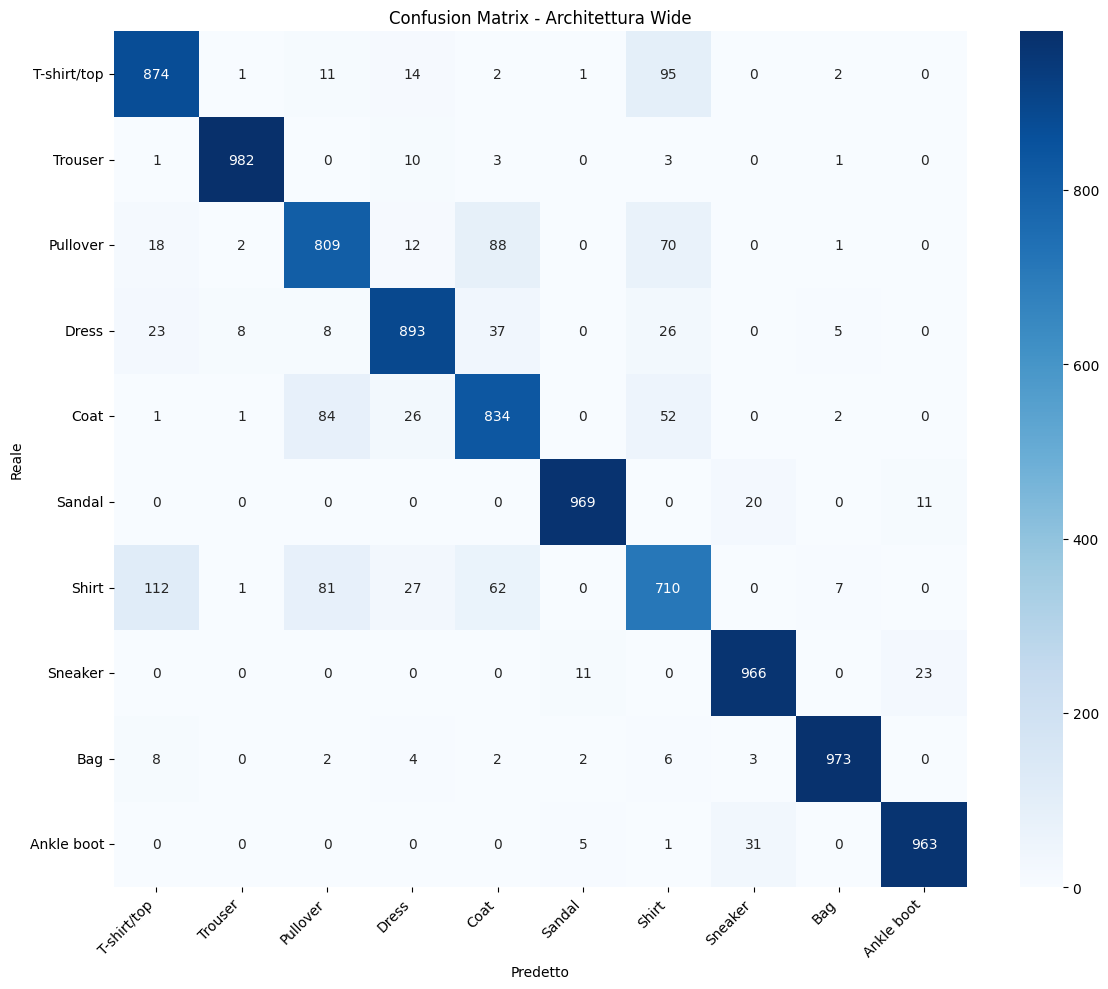


Classification Report - Wide:
              precision    recall  f1-score   support

 T-shirt/top       0.84      0.87      0.86      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.81      0.81      0.81      1000
       Dress       0.91      0.89      0.90      1000
        Coat       0.81      0.83      0.82      1000
      Sandal       0.98      0.97      0.97      1000
       Shirt       0.74      0.71      0.72      1000
     Sneaker       0.95      0.97      0.96      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.97      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

Using pretrained weights - learning curves not available


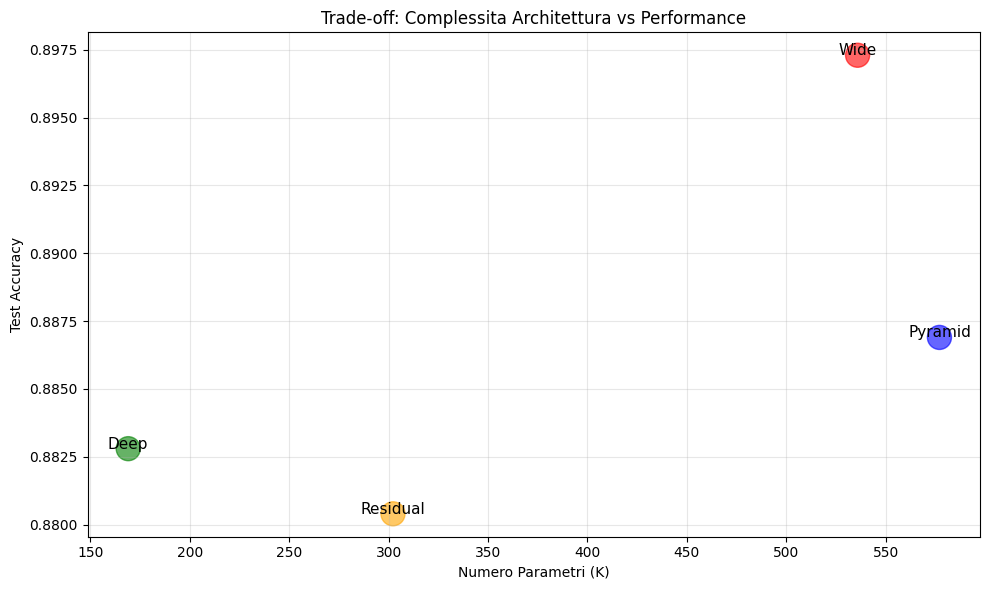

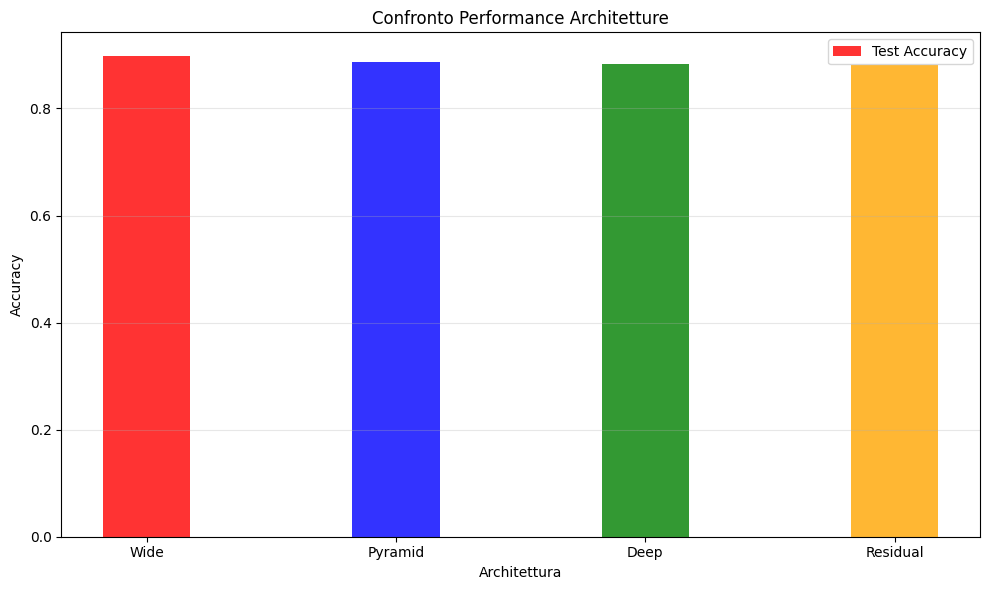


Migliore architettura: Wide
Test Accuracy: 0.8973
Parametri: 535,818

Esercizio 4 completato!


In [22]:
# ============================================================================
# ESERCIZIO 4: Architetture Neurali Avanzate per Image Classification
# ============================================================================
# Task: Confrontare diverse architetture neurali su task di classificazione multi-classe
# Dataset: Fashion MNIST completo (70000 immagini, 10 classi)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torchvision
from sklearn.metrics import classification_report, confusion_matrix

# Caricamento dataset
np.random.seed(999)
torch.manual_seed(999)
fmnist_train_ex4 = torchvision.datasets.FashionMNIST(root='../data', train=True, download=True)
fmnist_test_ex4 = torchvision.datasets.FashionMNIST(root='../data', train=False, download=True)

X_fmnist = fmnist_train_ex4.data.numpy().reshape(-1, 784) / 255.0
y_fmnist = fmnist_train_ex4.targets.numpy()
X_test_fmnist_ex4 = fmnist_test_ex4.data.numpy().reshape(-1, 784) / 255.0
y_test_fmnist_ex4 = fmnist_test_ex4.targets.numpy()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(f"Dataset Fashion MNIST Completo")
print(f"Train: {X_fmnist.shape}, Test: {X_test_fmnist_ex4.shape}")
print(f"Classi: {len(class_names)}")

# Helper function for training with early stopping and LR reduction
def train_fmnist_model(model, X_train_np, y_train_np, epochs=25, batch_size=256, val_split=0.15, patience_es=5, patience_lr=3, weight_decay=0.0):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=weight_decay)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=patience_lr, min_lr=1e-6)

    X_t = torch.FloatTensor(X_train_np).to(device)
    y_t = torch.LongTensor(y_train_np).to(device)

    n_val = int(len(X_t) * val_split)
    idx = torch.randperm(len(X_t))
    X_tr, y_tr = X_t[idx[n_val:]], y_t[idx[n_val:]]
    X_vl, y_vl = X_t[idx[:n_val]], y_t[idx[:n_val]]

    train_ds = TensorDataset(X_tr, y_tr)
    loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)

    history = {'loss': [], 'accuracy': [], 'val_loss': [], 'val_accuracy': []}
    best_val_loss = float('inf')
    patience_counter = 0
    best_state = None

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        for bx, by in loader:
            optimizer.zero_grad()
            out = model(bx)
            loss = criterion(out, by)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * bx.size(0)
            _, predicted = torch.max(out, 1)
            total += by.size(0)
            correct += (predicted == by).sum().item()

        train_loss = running_loss / total
        train_acc = correct / total

        model.eval()
        with torch.no_grad():
            val_out = model(X_vl)
            val_loss = criterion(val_out, y_vl).item()
            _, val_pred = torch.max(val_out, 1)
            val_acc = (val_pred == y_vl).sum().item() / len(y_vl)

        scheduler.step(val_loss)

        history['loss'].append(train_loss)
        history['accuracy'].append(train_acc)
        history['val_loss'].append(val_loss)
        history['val_accuracy'].append(val_acc)

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
            best_state = {k: v.clone() for k, v in model.state_dict().items()}
        else:
            patience_counter += 1
            if patience_counter >= patience_es:
                model.load_state_dict(best_state)
                break

    return history

def evaluate_fmnist(model, X_np, y_np):
    model.eval()
    with torch.no_grad():
        X_t = torch.FloatTensor(X_np).to(device)
        y_t = torch.LongTensor(y_np).to(device)
        out = model(X_t)
        loss = nn.CrossEntropyLoss()(out, y_t).item()
        _, pred = torch.max(out, 1)
        acc = (pred == y_t).sum().item() / len(y_t)
    return loss, acc

# Scrivi la tua soluzione qui
raise NotImplementedError()